In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox, skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# 1. Import and preprocess the dataset.

In [2]:
df = pd.read_csv('Datasets/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
df.shape

(545, 13)

In [3]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
num_df = df.select_dtypes('number')
num_df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [8]:
cat_df = df.select_dtypes('O')
cat_df

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [10]:
for col in cat_df:
    print(f"Column: {col} - {df[col].value_counts()}\n")

Column: mainroad - mainroad
yes    468
no      77
Name: count, dtype: int64

Column: guestroom - guestroom
no     448
yes     97
Name: count, dtype: int64

Column: basement - basement
no     354
yes    191
Name: count, dtype: int64

Column: hotwaterheating - hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Column: airconditioning - airconditioning
no     373
yes    172
Name: count, dtype: int64

Column: prefarea - prefarea
no     417
yes    128
Name: count, dtype: int64

Column: furnishingstatus - furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64



In [13]:
OHE_cols = cat_df.columns.drop('furnishingstatus')
OHE_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [22]:
df[OHE_cols] = pd.get_dummies(df[OHE_cols], dtype='int', drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [28]:
df['furnishingstatus'].head(10)

0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
5    semi-furnished
6    semi-furnished
7       unfurnished
8         furnished
9       unfurnished
Name: furnishingstatus, dtype: object

In [34]:
encoder = OrdinalEncoder()
df['furnishingstatus'] = encoder.fit_transform(df[['furnishingstatus']])
df['furnishingstatus'] = df['furnishingstatus'].astype(int)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [35]:
num_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

1 price
2 area
3 bedrooms
4 bathrooms
5 stories
6 parking


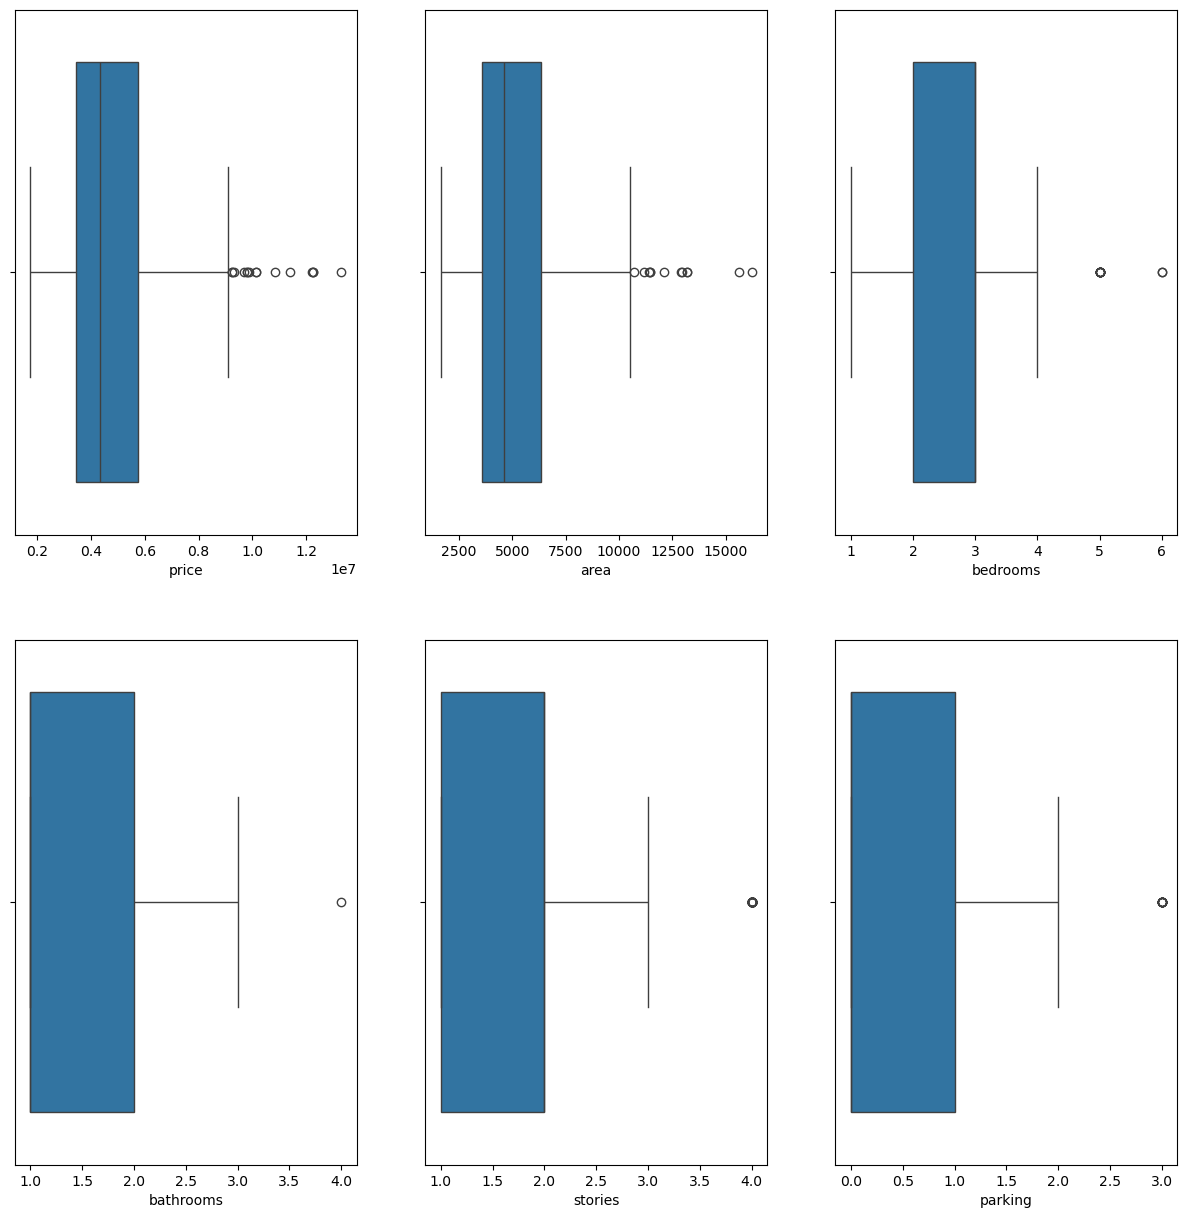

In [37]:
plt.figure(figsize = (15, 15))
for i, col in enumerate(num_df, 1):
    print(i, col)
    plt.subplot(2, 3, i)
    sns.boxplot(data = df, x = col)

Text(0.5, 1.0, 'Area\nSkewness = 1.3175492613408553')

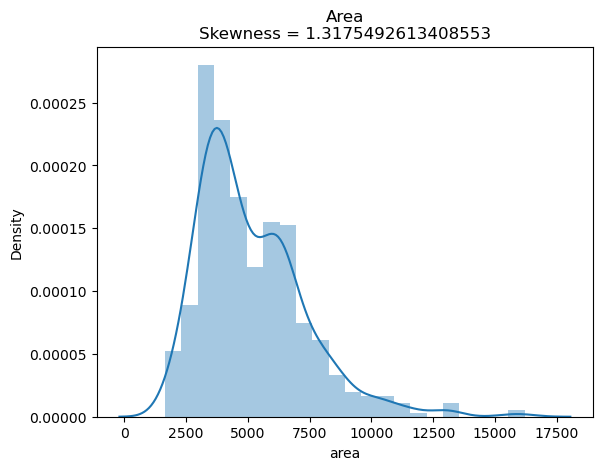

In [71]:
sns.distplot(df['area'])
plt.title(f"Area\nSkewness = {skew(df['area'])}")

Text(0.5, 1.0, 'Area\nSkewness = 0.004154177172785236')

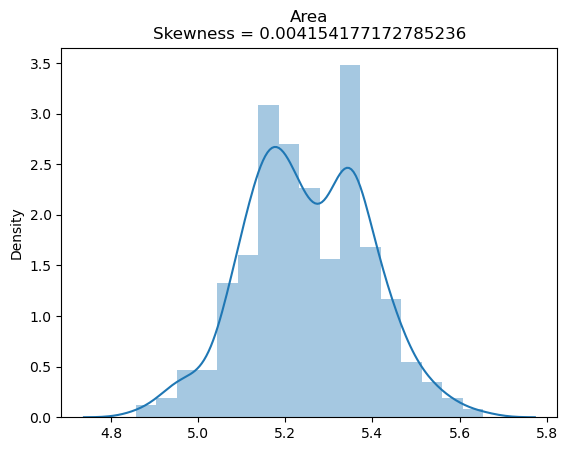

In [72]:
boxcox_trans, _ = boxcox(df['area'])
sns.distplot(boxcox_trans)
plt.title(f"Area\nSkewness = {skew(boxcox_trans)}")

In [74]:
df.area

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [73]:
boxcox_trans

array([5.40613844, 5.46822452, 5.50242981, 5.40970775, 5.40613844,
       5.40970775, 5.45408534, 5.65406504, 5.43518494, 5.3198667 ,
       5.5913321 , 5.33445601, 5.36428071, 5.14390929, 5.4227216 ,
       5.33445601, 5.36685152, 5.45101901, 5.24210738, 5.35749207,
       5.21983424, 5.39399883, 5.43314408, 5.23902019, 5.46235487,
       5.3637639 , 5.33445601, 5.46512107, 5.42901931, 5.30454677,
       5.40859695, 5.3866618 , 5.26290704, 5.33216811, 5.37889415,
       5.3866618 , 5.4089084 , 5.46967355, 5.33445601, 5.33445601,
       5.36428071, 5.35430658, 5.3606443 , 5.33445601, 5.33445601,
       5.33445601, 5.33445601, 5.36685152, 5.21818161, 5.40703481,
       5.40703481, 5.35243275, 5.33445601, 5.28173149, 5.33445601,
       5.33445601, 5.54654699, 5.46967355, 5.41758467, 5.33445601,
       5.33445601, 5.46530455, 5.34783309, 5.35430658, 5.53913651,
       5.46530455, 5.5913321 , 5.41844706, 5.33445601, 5.56393587,
       5.19230266, 5.33445601, 5.2728099 , 5.36685152, 5.19587

In [75]:
df['area'] = boxcox_trans
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,5.406138,4,2,3,1,0,0,0,1,2,1,0
1,12250000,5.468225,4,4,4,1,0,0,0,1,3,0,0
2,12250000,5.502430,3,2,2,1,0,1,0,0,2,1,1
3,12215000,5.409708,4,2,2,1,0,1,0,1,3,1,0
4,11410000,5.406138,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,5.087043,2,1,1,1,0,1,0,0,2,0,2
541,1767150,5.002785,3,1,1,0,0,0,0,0,0,0,1
542,1750000,5.156202,2,1,1,1,0,0,0,0,0,0,2
543,1750000,5.075678,3,1,1,0,0,0,0,0,0,0,0


# 2. Split data into train-test sets.

In [79]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [80]:
df.shape

(545, 13)

In [82]:
X = df.drop('price', axis = 1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5.406138,4,2,3,1,0,0,0,1,2,1,0
1,5.468225,4,4,4,1,0,0,0,1,3,0,0
2,5.502430,3,2,2,1,0,1,0,0,2,1,1
3,5.409708,4,2,2,1,0,1,0,1,3,1,0
4,5.406138,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,5.087043,2,1,1,1,0,1,0,0,2,0,2
541,5.002785,3,1,1,0,0,0,0,0,0,0,1
542,5.156202,2,1,1,1,0,0,0,0,0,0,2
543,5.075678,3,1,1,0,0,0,0,0,0,0,0


In [84]:
y = df['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 12), (109, 12), (436,), (109,))

# 3. Fit a Linear Regression model using sklearn.linear_model.

In [87]:
model = LinearRegression()
model

LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression()

In [89]:
predictions = model.predict(X_test)
predictions

array([5456225.51096373, 7397677.9433074 , 3114229.83343517,
       4632937.84098511, 3390569.62065063, 3685985.32328587,
       5604703.39420899, 6540465.50746377, 2668436.38348276,
       2565192.1581662 , 9546131.90807313, 2850841.39128328,
       3241709.04103621, 3370415.61726183, 3765782.47871563,
       5292372.22182403, 2453492.41803079, 4874615.35061528,
       4527931.6481874 , 3674492.68631271, 5903578.51413016,
       5900911.9165001 , 2740824.1778244 , 4739489.15628828,
       5237162.46007216, 7448109.15982218, 3056477.63433117,
       5038076.33831457, 7669034.41596679, 3304249.19182565,
       6498567.88953672, 3205898.00125515, 6755269.51248856,
       4294524.49507985, 3696234.39520162, 5816586.71516572,
       4786946.38109099, 4246616.64466136, 3224189.03219708,
       4444786.70179157, 4565582.48651088, 3460507.27030537,
       7380715.17060857, 4092702.40242675, 3836122.6326475 ,
       4361874.04407983, 6788983.37530747, 4091663.89622318,
       3848744.07011856,

# 4. Evaluate model using MAE, MSE, R2.

In [91]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}\n"
      f"Mean Squared Error: {mean_squared_error(y_test,  predictions)}\n"
      f"R2 Score: {r2_score(y_test, predictions)}")

Mean Absolute Error: 983870.1977413459
Mean Squared Error: 1789690915843.4375
R2 Score: 0.6459261957765132


In [92]:
model.coef_

array([4042911.70047259,   80668.42134541, 1090592.88568385,
        405290.37303224,  254762.06073732,  146840.7093794 ,
        415725.13008026,  697522.57551198,  727358.26286877,
        211541.40789008,  679153.57415225, -224735.80083393])

In [93]:
model.intercept_

-19579488.276268087

# 5. Plot regression line and interpret coefficients.

<Axes: >

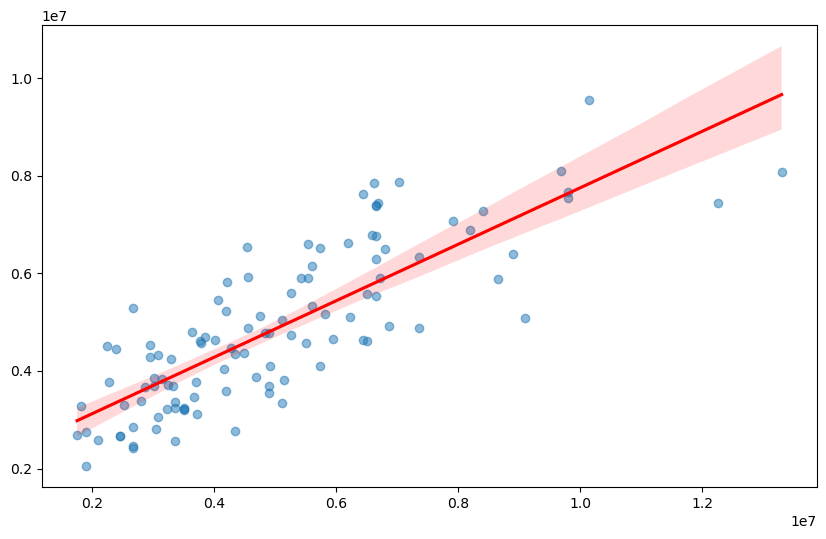

In [100]:
plt.figure(figsize=(10,6)) 
sns.regplot(x=y_test.ravel(), y=predictions.ravel(), line_kws={'color':'red'}, scatter_kws={'alpha':0.5})